In [70]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [ ]:
titanic = pd.read_csv('https://stepik.org/media/attachments/course/4852/titanic.csv')

In [ ]:
titanic.sample(5)

In [ ]:
titanic.info()

In [ ]:
titanic.describe()

In [ ]:
titanic.corr()

In [ ]:
X = titanic.drop(['PassengerId','Survived','Name','Ticket','Cabin'],axis=1)
y = titanic[['Survived']]
X.fillna({'Age': X.Age.median()},inplace=True)

In [ ]:
class Classifier:
    def __init__(self, typ):
        if typ == 'forest':
            self.model = RandomForestClassifier(n_jobs = -1)
        else:
            self.model = DecisionTreeClassifier(criterion='entropy')
            
    def encod(self, X, typ):
        self.model2 = None
        if typ == 'dummies':
            return pd.get_dummies(X)
        if self.model2 is None:
            self.model2 = LabelEncoder().fit(X)
        return self.model2.transform(X)
    
    def fit(self, x, y):
        self.model.fit(x, y)
    
            

In [ ]:
clf = Classifier('')

In [ ]:
X['Sex'] = clf.encod(X['Sex'], '')
X['Embarked'] = clf.encod(X['Embarked'], '')

In [ ]:
X.sample(2)

In [ ]:
clf.fit(X,y)

In [ ]:
clf.model.score(X,y)

## Iris

In [39]:
import pandas as pd
import numpy as np
np.random.seed(0)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import plotly.graph_objects as go

In [22]:
df = pd.read_csv("https://stepik.org/media/attachments/course/4852/train_iris.csv",index_col = 0)
df_test = pd.read_csv("https://stepik.org/media/attachments/course/4852/test_iris.csv",index_col = 0)

In [23]:
df.sample(2)

,sepal length,sepal width,petal length,petal width,species
144,6.7,3.3,5.7,2.5,2
134,6.1,2.6,5.6,1.4,2


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 130 to 68
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  100 non-null    float64
 1   sepal width   100 non-null    float64
 2   petal length  100 non-null    float64
 3   petal width   100 non-null    float64
 4   species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


In [25]:
X_train = df.drop(['species'], axis = 1)
y_train = df[['species']]
X_test = df_test.drop(['species'], axis = 1)
y_test = df_test[['species']]
data = []
# https://stepik.org/media/attachments/course/4852/test_iris.csv

In [26]:
for i in range(1, 101):
    model = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    data.append((i, model.score(X_test, y_test), model.score(X_train, y_train)))

In [33]:
data = tuple(zip(*data))

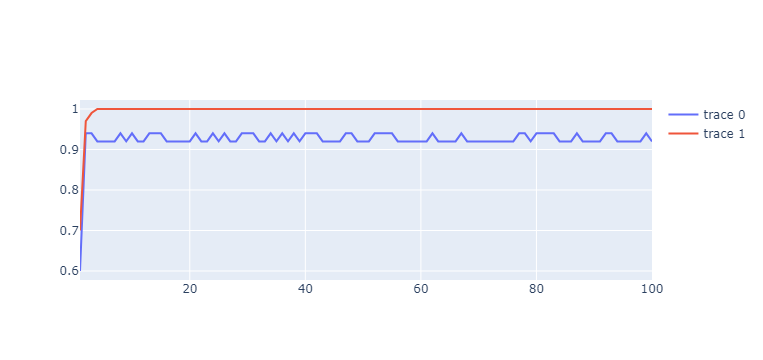

In [42]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=data[0], y=data[1]))
fig.add_trace(go.Scatter(x=data[0],y=data[2]))
fig.show()

# Time limit

In [43]:
#https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv

In [58]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/dogs_n_cats.csv')

In [59]:
df.sample(2)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
604,10,4.0,1,0,1,котик
859,5,2.0,0,0,1,котик


In [60]:
model = LabelEncoder()
df['Вид'] = model.fit_transform(df['Вид'].values)

In [61]:
df.sample(2)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
128,19,22.8,1,1,0,1
757,5,2.0,1,0,1,0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Длина               1000 non-null   int64  
 1   Высота              1000 non-null   float64
 2   Шерстист            1000 non-null   int64  
 3   Гавкает             1000 non-null   int64  
 4   Лазает по деревьям  1000 non-null   int64  
 5   Вид                 1000 non-null   int32  
dtypes: float64(1), int32(1), int64(4)
memory usage: 43.1 KB


In [63]:
score_max = 0
indx = 0
X = df.drop(['Вид'],axis=1)
y = df[['Вид']]

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [77]:
for i in tqdm(range(1, 1001)):
    model2 = DecisionTreeClassifier(max_depth=i).fit(X_train, y_train)
    if score_max < (temp := model2.score(X_test,y_test)):
        score_max = temp
        indx = i
else:
    model2 = DecisionTreeClassifier(max_depth=indx).fit(X_train, y_train)

100%|█████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:03<00:00, 325.48it/s]


In [79]:
test_json = pd.read_json('dataset_209691_15.json')

In [80]:
test_json.head(2)

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,24,28.8,1,0,0
1,30,36.0,1,0,0


In [81]:
temp = model2.predict(test_json)

In [82]:
temp

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [83]:
from functools import reduce

In [84]:
reduce(lambda x,y: x+y, temp)

55

## Precision

In [87]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [88]:
df.sample(2)

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
277,you-owe-me-one,2012,abba,Pop,Frida Now there's a shadow falling over our fa...,1370,14,0,0,0
32,jfk-2-lax,2006,gangstarr,Hip-Hop,Yo\nYo Premier?\nYeah whassup G?\nThat trip to...,3176,35,0,0,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   song          360 non-null    object
 1   year          360 non-null    int64 
 2   artist        360 non-null    object
 3   genre         360 non-null    object
 4   lyrics        360 non-null    object
 5   length        360 non-null    int64 
 6   commas        360 non-null    int64 
 7   exclamations  360 non-null    int64 
 8   colons        360 non-null    int64 
 9   hyphens       360 non-null    int64 
dtypes: int64(6), object(4)
memory usage: 28.2+ KB


In [91]:
df.nunique()

song            336
year             16
artist            3
genre             3
lyrics          316
length          294
commas           56
exclamations     12
colons            9
hyphens          25
dtype: int64

In [92]:
df[['artist','genre']].drop_duplicates()

,artist,genre
0,gangstarr,Hip-Hop
1,blind-guardian,Metal
6,abba,Pop


In [93]:
from sklearn import metrics

In [94]:
# GridSearchCV